# Mini Project 5-4 Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [3]:
# Import c4_epa_air_quality.csv
aqi = pd.read_csv('c4_epa_air_quality.csv')

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [4]:
# Code Here
print(aqi.head())

   Unnamed: 0  date_local    state_name   county_name      city_name  \
0           0  2018-01-01       Arizona      Maricopa        Buckeye   
1           1  2018-01-01          Ohio       Belmont      Shadyside   
2           2  2018-01-01       Wyoming         Teton  Not in a city   
3           3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4           4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure  arithmetic_mean  aqi  
0  Parts per million         0.473684    7  
1  Parts per million         0.263158 

In [5]:
# Code Here
aqi.describe

<bound method NDFrame.describe of      Unnamed: 0  date_local            state_name           county_name  \
0             0  2018-01-01               Arizona              Maricopa   
1             1  2018-01-01                  Ohio               Belmont   
2             2  2018-01-01               Wyoming                 Teton   
3             3  2018-01-01          Pennsylvania          Philadelphia   
4             4  2018-01-01                  Iowa                  Polk   
..          ...         ...                   ...                   ...   
255         255  2018-01-01  District Of Columbia  District of Columbia   
256         256  2018-01-01             Wisconsin                 Dodge   
257         257  2018-01-01              Kentucky             Jefferson   
258         258  2018-01-01              Nebraska               Douglas   
259         259  2018-01-01        North Carolina                  Wake   

         city_name                                    local_site_

In [6]:
# Code Here
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        260 non-null    int64  
 1   date_local        260 non-null    object 
 2   state_name        260 non-null    object 
 3   county_name       260 non-null    object 
 4   city_name         260 non-null    object 
 5   local_site_name   257 non-null    object 
 6   parameter_name    260 non-null    object 
 7   units_of_measure  260 non-null    object 
 8   arithmetic_mean   260 non-null    float64
 9   aqi               260 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 20.4+ KB


**Question:** What time range does this data cover?

In [8]:
# find earliest date and latest date
print(aqi['date_local'].min())
print(aqi['date_local'].max())

2018-01-01
2018-01-01


A: All values are on January 1, 2001

**Question:** What are the minimum and maximum AQI values observed in the dataset?

In [9]:
# Code Here
print(aqi['aqi'].min())
print(aqi['aqi'].max())

0
50


**Question:** Are all states equally represented in the dataset?

In [11]:
# Count the number of unique values in the 'state' column
print(aqi['state_name'].nunique())

52


A: 52

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [13]:
# Summarize the mean AQI for california, flordia, michigan, ohio, pennsylvania, and texas


# Create a list of RRE states.
states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Subset `aqi` to only consider these states.
aqi_rre = aqi[aqi['state_name'].isin(states)]


# Find the mean aqi for each of the RRE states.
aqi_rre_mean = aqi_rre.groupby('state_name')['aqi'].mean().reset_index()
print(aqi_rre_mean)


     state_name        aqi
0    California  12.121212
1       Florida   5.500000
2      Michigan   8.111111
3          Ohio   3.333333
4  Pennsylvania   2.900000
5         Texas   2.700000


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

<Axes: xlabel='state_name', ylabel='aqi'>

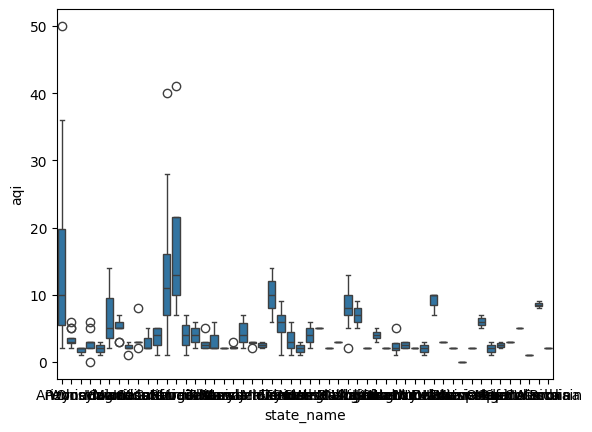

In [17]:
# Import seaborn as sns.
import seaborn as sns
# plot a boxplot to compare the distribution of AQI scores by all states
sns.boxplot(x='state_name', y='aqi', data=aqi)

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

<Axes: title={'center': 'aqi'}, xlabel='state_name'>

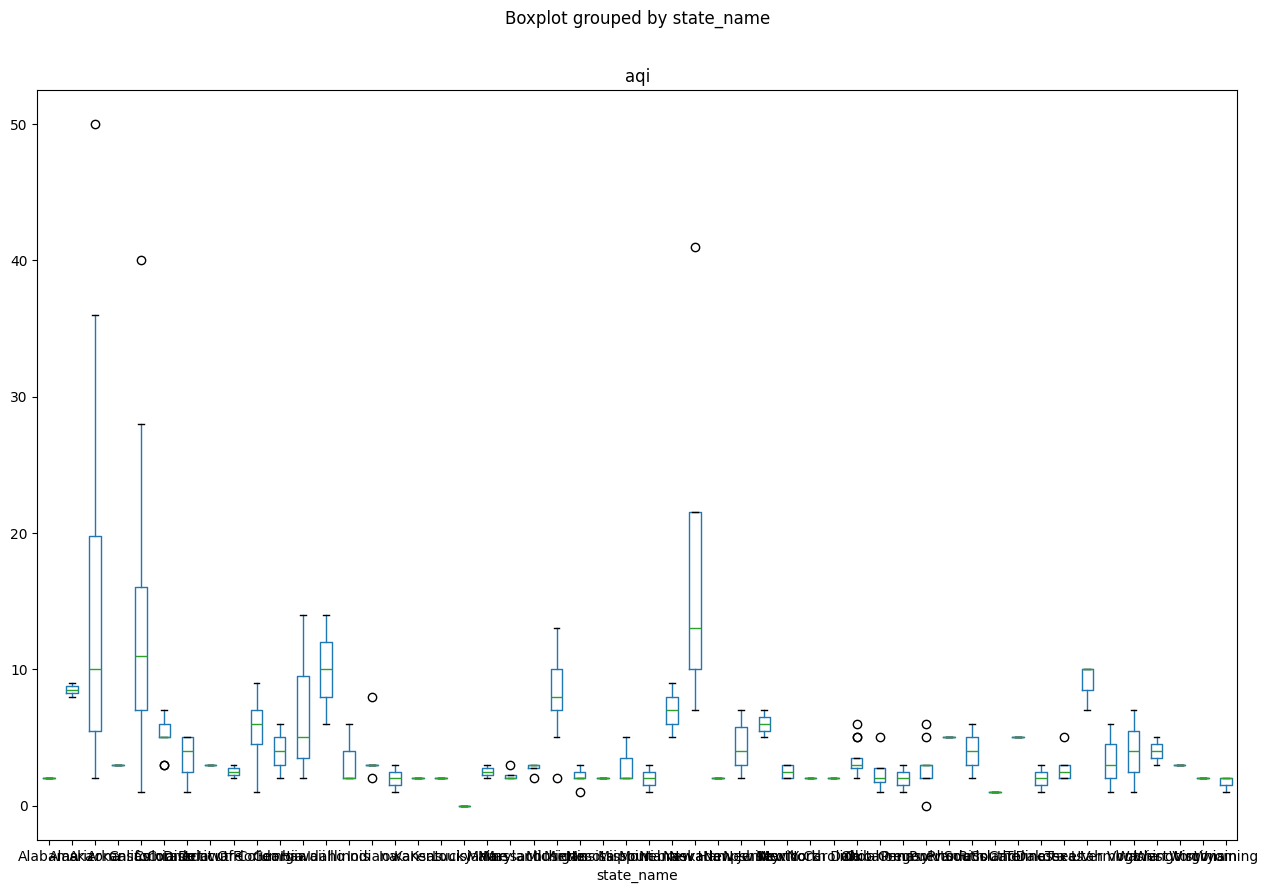

In [18]:
# create an in-line visualization of the AQI data by state_name
aqi.boxplot(column='aqi', by='state_name', figsize=(15, 10), grid=False)

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

In [19]:
# find the highest 5 mean aqi by state
aqi_mean = aqi.groupby('state_name')['aqi'].mean().reset_index()
aqi_mean = aqi_mean.sort_values(by='aqi', ascending=False)
aqi_mean.head(5)

,state_name,aqi
28,Nevada,18.500000
2,Arizona,15.214286
4,California,12.121212
12,Idaho,10.000000
45,Utah,9.000000


A:I expect Nevada, Arizona, California, Idaho, and Utah to be effected the most.

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for CA.

In [22]:
# Find the mean aqi for CA state.
aqi_ca = aqi[aqi['state_name'] == 'California']
aqi_ca_mean = aqi_ca.groupby('state_name')['aqi'].mean().reset_index()

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [20]:
# Input your confidence level here: 95%
confidence_level = 0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [24]:
# Calculate your margin of error.


# Begin by identifying the z associated with your chosen confidence level.

z_value = 1.96

# Next, calculate your standard error.
standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca['aqi'].count())


# Lastly, use the preceding result to calculate your margin of error.
margin_of_error = z_value * standard_error
print(margin_of_error)



1.7614930896609726


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [26]:
# Calculate your confidence interval (upper and lower limits).
# The confidence interval is the mean +/- the margin of error.
lower_limit = aqi_ca_mean['aqi'].values[0] - margin_of_error
upper_limit = aqi_ca_mean['aqi'].values[0] + margin_of_error
print(f"Confidence Interval: ({lower_limit}, {upper_limit})")

Confidence Interval: (10.359719031551148, 13.882705210873095)


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [27]:
# Import stats from scipy.
from scipy import stats

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [29]:
# calculate confidence interval using scipy. confidence level .95. use stats.norm.interval()
confidence_level = 0.95
confidence_interval = stats.norm.interval(confidence_level, loc=aqi_ca_mean['aqi'].values[0], scale=standard_error)
print(confidence_interval)

(np.float64(10.359751399400034), np.float64(13.882672843024208))


# Considerations

**What are some key takeaways that you learned from this project?**

A: There are multiple good python packages for calculating important statistics.

**What findings would you share with others?**

A: If you do not like the package you are working with, it is usually easy to find another one.

**What would you convey to external readers?**

A: I do not have anything specific to say to external readers.

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 